# Initial Data Exploration
## Recreating Avg TSA
#### Author: Sofia Ingersoll
##### Date: 2024-01-15

##### Packages

In [1]:
# loading packages
import pandas as pd
import geopandas as gpd
import xarray as xr
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

##### Data

In [2]:
# load the data that's stored in casper
file = '/glade/campaign/cgd/tss/projects/PPE/PPEn11_OAAT/CTL2010/hist/PPEn11_CTL2010_OAAT0000.clm2.h0.2005-02-01-00000.nc'
ds = xr.open_dataset(file)

##### Exploration

400 grid cells, 10 year simulation, the file is 2D contains grid cell and time, average overtime and map


We want avg TSA

In [3]:
ds

<xarray.Dataset>
Dimensions:                            (levgrnd: 25, levsoi: 20, levlak: 10,
                                        levdcmp: 25, time: 120,
                                        hist_interval: 2, lon: 144, lat: 96,
                                        gridcell: 400, landunit: 1148,
                                        column: 2599, pft: 4387, cft: 2,
                                        ltype: 9, nvegwcs: 4)
Coordinates:
  * levgrnd                            (levgrnd) float32 0.01 0.04 ... 42.0
  * levsoi                             (levsoi) float32 0.01 0.04 ... 6.94 8.03
  * levlak                             (levlak) float32 0.05 0.6 ... 34.33 44.78
  * levdcmp                            (levdcmp) float32 0.01 0.04 ... 42.0
  * time                               (time) object 2005-02-01 00:00:00 ... ...
  * lon                                (lon) float32 0.0 2.5 5.0 ... 355.0 357.5
  * lat                                (lat) float32 -90.0 -88.11 ... 88.11 90.0
Dimensions without coordinates: hist_interval, gridcell, landunit, column, pft,
                                cft, ltype, nvegwcs
Data variables: (12/497)
    mcdate                             (time) int32 ...
    mcsec                              (time) int32 ...
    mdcur                              (time) int32 ...
    mscur                              (time) int32 ...
    nstep                              (time) int32 ...
    time_bounds                        (time, hist_interval) object ...
    ...                                 ...
    XSMRPOOL                           (time, gridcell) float32 ...
    XSMRPOOL_RECOVER                   (time, gridcell) float32 ...
    ZBOT                               (time, gridcell) float32 ...
    ZWT                                (time, gridcell) float32 ...
    ZWT_CH4_UNSAT                      (time, gridcell) float32 ...
    ZWT_PERCH                          (time, gridcell) float32 ...
Attributes: (12/40)
    title:                                     CLM History file information
    comment:                                   NOTE: None of the variables ar...
    Conventions:                               CF-1.0
    history:                                   created on 09/06/23 02:33:14
    source:                                    Community Terrestrial Systems ...
    hostname:                                  cheyenne
    ...                                        ...
    ctype_urban_pervious_road:                 75
    cft_c3_crop:                               1
    cft_c3_irrigated:                          2
    time_period_freq:                          month_1
    Time_constant_3Dvars_filename:             ./PPEn11_CTL2010_OAAT0000.clm2...
    Time_constant_3Dvars:                      ZSOI:DZSOI:WATSAT:SUCSAT:BSW:H...

##### Avg TSA 

Want to take the mean of variable `TSA` so we can use this as a variable to color map with later.

In [4]:
tsa = ds['TSA']

tsa

<xarray.DataArray 'TSA' (time: 120, gridcell: 400)>
[48000 values with dtype=float32]
Coordinates:
  * time     (time) object 2005-02-01 00:00:00 ... 2015-01-01 00:00:00
Dimensions without coordinates: gridcell
Attributes:
    long_name:     2m air temperature
    units:         K
    cell_methods:  time: mean

In [5]:
tsa_avg = tsa.mean(dim = 'time')

##### Visualization

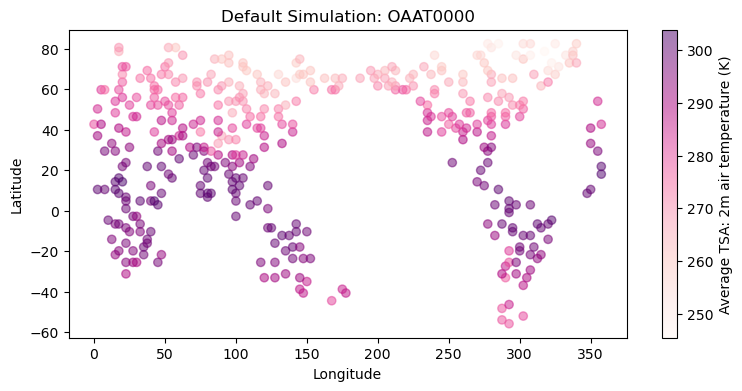

In [6]:
plt.figure(figsize = (9,4))
plt.scatter(ds.grid1d_lon,
            ds.grid1d_lat,
            c = tsa_avg,
           cmap = 'RdPu',
           alpha = 0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Default Simulation: OAAT0000')
plt.colorbar(label = 'Average TSA: 2m air temperature (K)')

### Function to Automate Global Avg Weighted Landarea by Gridcell

In [7]:
# function to read in data using filepath
def weight_landarea_gridcells(filepath):

#-------Variable Data-----------------
# variable data described by filepath stored as ds
    file = '/glade/campaign/cgd/tss/projects/PPE/PPEn11_OAAT/CTL2010/hist/PPEn11_CTL2010_OAAT0000.clm2.h0.2005-02-01-00000.nc'
    ds = xr.open_dataset(file)

#-------Gridcell Landareas Data-----
# reading, storing, subsetting
    file2 = '/glade/campaign/cgd/tss/projects/PPE/helpers/sparsegrid_landarea.nc'
    ds2 = xr.open_dataset(file2)
    landarea = ds2['landarea']
    
#------Weight Gridcells by Landarea---
    for gridcell in ds:
        ds.weighted(landarea)

In [8]:
# dummy variable filepath for TSA,
filepath_example = '/glade/campaign/cgd/tss/projects/PPE/PPEn11_OAAT/CTL2010/hist/PPEn11_CTL2010_OAAT0000.clm2.h0.2005-02-01-00000.nc'

# testing our function works!
ds = weight_landarea_gridcells(filepath_example)

In [9]:
# subsetting dummy variable
tsa = ds['TSA']

# calculate global mean over time
tsa_avg = tsa.mean(dim = 'time')

# plot mean tsa overtime of weighted gridcells
plt.figure(figsize = (9,4))
plt.scatter(ds.grid1d_lon,
            ds.grid1d_lat,
            c = tsa_avg,
           cmap = 'RdPu',
           alpha = 0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Default Simulation: OAAT0000')
plt.colorbar(label = 'Average TSA: 2m air temperature (K)')

TypeError: 'NoneType' object is not subscriptable

#### Building up function to include variable(s) selection

In [ ]:
# function to read in data using filepath & variable of interest
def ds_processing(filepath, variable_choosen,):

#-------Variable Data-----------------
# variable data described by filepath stored as ds
# reading, storing, subsetting
    file = '/glade/campaign/cgd/tss/projects/PPE/PPEn11_OAAT/CTL2010/hist/PPEn11_CTL2010_OAAT0000.clm2.h0.2005-02-01-00000.nc'
    ds = xr.open_dataset(file)
    variable = ds[variable_chosen]


#-------Gridcell Landareas Data-----
# reading, storing, subsetting
    file2 = '/glade/campaign/cgd/tss/projects/PPE/helpers/sparsegrid_landarea.nc'
    ds2 = xr.open_dataset(file2)
    landarea = ds2['landarea']


#------Weight Gridcells by Landarea---
    for gridcell in variable:
        variable.weighted(landarea)


#-----Calculating Variable Avg--------
variable_avg = variable.mean(dim = 'time')

#ds_processing(filepath_example, 'TSA')


#-----Generating Plot------------------
plt.figure(figsize = (9,4))
plt.scatter(ds.grid1d_lon,
            ds.grid1d_lat,
            c = variable_avg,
           cmap = 'RdPu',
           alpha = 0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Default Simulation: OAAT0000')
plt.colorbar(label = 'Average TSA: 2m air temperature (K)')        # need to correct w/ f string. also want to implement f string for variable name in a few different places in this function